<a href="https://colab.research.google.com/github/tasmimjoti/Deep-Learning-Project/blob/main/Manifold%20Mixup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Model
import tensorflow as tf

# **Generating a synthetic spiral dataset**

In [ ]:
def generate_spiral_data(n_samples_per_class = 500, noise = 0.1, random_state = 42):
    t = np.linspace(0, 2*np.pi, n_samples_per_class)
    r = np.linspace(0, 1, n_samples_per_class)

    # Class 0
    x0 = r * np.sin(t + noise * np.random.randn(n_samples_per_class))
    y0 = r * np.cos(t + noise * np.random.randn(n_samples_per_class))

    # Class 1
    x1 = r * np.sin(t + np.pi + noise * np.random.randn(n_samples_per_class))
    y1 = r * np.cos(t + np.pi + noise * np.random.randn(n_samples_per_class))

    X = np.concatenate((np.column_stack((x0, y0)), np.column_stack((x1, y1))))
    y = np.concatenate((np.zeros(n_samples_per_class), np.ones(n_samples_per_class)))

    return X, y

# **Defining neural network architectures for the baseline model and manifold mixup model**

In [ ]:
def create_baseline_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(64, activation = 'relu')(inputs)
    x = layers.Dense(64, activation = 'relu')(x)
    outputs = layers.Dense(1, activation = 'sigmoid')(x)  # Binary classification
    return Model(inputs, outputs)

In [ ]:
def create_manifold_mixup_model(input_shape):
    inputs = layers.Input(shape = input_shape)
    x = layers.Dense(64, activation = 'relu')(inputs)
    x = layers.Dense(64, activation = 'relu')(x)
    outputs = layers.Dense(1, activation = 'sigmoid')(x)  # Binary classification
    return Model(inputs, outputs)

# **Implementing the manifold mixup forward pass**

In [ ]:
def manifold_mixup_forward_pass(x, y, alpha = 0.2):
    lam = np.random.beta(alpha, alpha)
    index = np.random.randint(0, len(x))
    x_mix = lam * x + (1 - lam) * x[index]
    y_mix = lam * y + (1 - lam) * y[index]
    return x_mix, y_mix

# **Training both models using the synthetic spiral dataset**

In [ ]:
def train_model(model, X_train, y_train, epochs = 10, batch_size = 32, alpha = 0.2):
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    for epoch in range(epochs):
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            x_mix, y_mix = manifold_mixup_forward_pass(x_batch, y_batch, alpha=alpha)
            model.train_on_batch(x_mix, y_mix)

# **Plotting the model confidence for both the baseline model and manifold mixup model**

In [ ]:
def plot_model_confidence(model, X, y):
    confidence = model.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c = confidence, cmap = 'coolwarm')
    plt.colorbar(label='Confidence')
    plt.title("Model Confidence")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

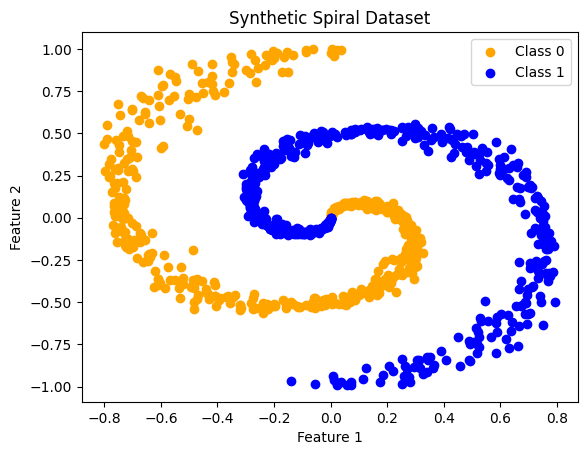

In [ ]:
X, y = generate_spiral_data(n_samples_per_class = 500, noise = 0.1, random_state = 42)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c = 'orange', label = 'Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c = 'blue', label = 'Class 1')
plt.title("Synthetic Spiral Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
baseline_model = create_baseline_model(input_shape=X_train.shape[1:])
train_model(baseline_model, X_train, y_train)

In [ ]:
manifold_mixup_model = create_manifold_mixup_model(input_shape=X_train.shape[1:])
train_model(manifold_mixup_model, X_train, y_train)

7/7 [==============================] - 0s 7ms/step


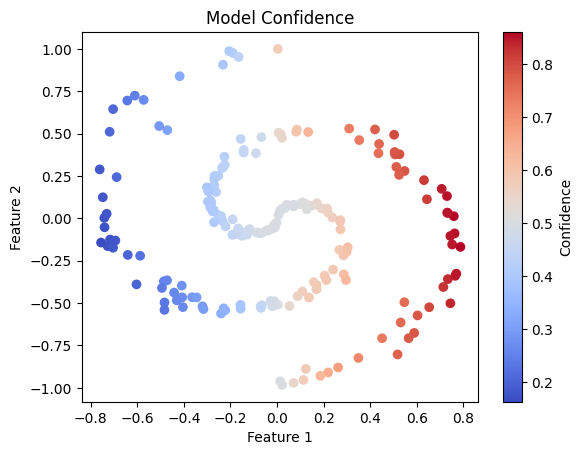

7/7 [==============================] - 0s 4ms/step


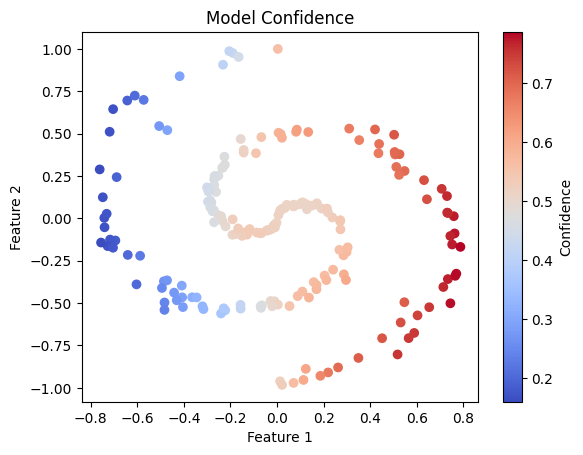

In [ ]:
plot_model_confidence(baseline_model, X_test, y_test)
plot_model_confidence(manifold_mixup_model, X_test, y_test)